In [185]:
#Uncomment this and run it if you do not have the package installed
#pip install autoviz

In [186]:
#Part 1 Data Source and Contents

#Importing Necessary Libraries and Database

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from autoviz import AutoViz_Class

df=pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

#Display the data frame see the dataset
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [187]:
#Print to see the data types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


Question 1: Why does it make sense to discretize columns for this problem?

There are a few reasons why it makes sense to discretize columns when it comes to producing decision trees. The simplest reason that we discretize the columns in this case is in order to make the decision tree simpler. When we don't need to focus on each value individually, it can lead to fewer split points which means that there is less likely to be overfitting.

With fewer paths for the decision tree to take, the training of the model will happen faster with better handling of the noisy data. This will also help reduce outliers.

Question 2: What might be the issues (if any) if we DID NOT discretize the columns for this problem?

As I mentioned in the first question, if we don't there is a risk that overfitting can happen. The thresholds that the model will come up with here would be too precise. This makes it harder to understand the model and explain the results. Because these thresholds are so precise, the smallest changes in the continuous data can lead to an entirely different decision. Another complication that could come up is that there will be more room for outliers in the data set which will affect the way the model makes decisions.

In [188]:
#Part 2: Data Quality Analysis (DQA)

#Find Missing Values within each column

df.isnull().sum()

#Going through each column except for the last two and removing the letter identifier for each bin
for col in df.drop(columns = ["flag","y"]):
    df[col] = df[col].str.split(".", n=1, expand = True)[1]


#Find NANs
df.isna().sum()

,0
hours_per_week_bin,0
occupation_bin,0
msr_bin,0
capital_gl_bin,0
race_sex_bin,0
education_num_bin,0
education_bin,0
workclass_bin,0
age_bin,0
flag,0


In [189]:
#Use the AutoViz kit that we learned in TW2 in order to determine whether there are outliers in the dataset
AV = AutoViz_Class()

dft = AV.AutoViz(
    df,        # Pass the DataFrame
    sep=",",      # Adjust if needed (e.g., ',' or '\t')
    depVar="y",  # Replace with actual column name
    dfte=None,
    header=0,
    verbose=2,
    lowess=False,
    chart_format='svg',
    save_plot_dir=None
)

#Based on the values and analysis conducted below there are no outliers to remove from this group.

Shape of your Data Set loaded: (48842, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : []
    Integer-Categorical Columns: []
    String-Categorical Columns: ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'age_bin']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['workclass_bin', 'flag']
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    10 Predictors classified...
        No variables removed since no ID or low-information varia

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
hours_per_week_bin,object,0.000000,0,,,No issue
occupation_bin,object,0.000000,0,,,No issue
msr_bin,object,0.000000,0,,,No issue
capital_gl_bin,object,0.000000,0,,,No issue
race_sex_bin,object,0.000000,0,,,No issue
education_num_bin,object,0.000000,0,,,No issue
education_bin,object,0.000000,0,,,No issue
workclass_bin,object,0.000000,0,,,No issue
age_bin,object,0.000000,0,,,No issue
flag,object,0.000000,0,,,No issue


No continuous var in data set: drawing categorical distribution plots
Could not draw catscatter plots. stat: path should be string, bytes, os.PathLike or integer, not NoneType
All Plots are saved in ./AutoViz_Plots/y
Time to run AutoViz = 9 seconds 


In [190]:
#Check for Duplicate entries

df.duplicated().sum()

#Of the 48,842 rows in this database,  40,0012 are duplicates.
#This does not make sense to remove these duplicates since we would lose a majority of
#the data.

40012

In [191]:
#Display the descriptive statisics for each column

df.describe(include="object")


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,31-40,Mid - Mid,High,= 0,High,9-12,Mid,income,40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


In [192]:
# Encoding using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder object
le = LabelEncoder()

# Iterate over each column in the original DataFrame
for col in df.columns:
    # Fit and transform the encoder on the column values
    encoded_values = le.fit_transform(df[col])
    # Replace the original column with the encoded values
    df[col] = encoded_values

# Checking the new DataFrame
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,3,2,2,0,1,0,0,3,1,0
1,0,0,0,1,0,1,0,0,4,1,0
2,1,1,2,1,0,4,4,0,3,1,0
3,1,1,0,1,2,0,2,0,4,1,0
4,1,0,0,1,1,1,0,0,1,1,0


In [193]:
#Creating X Train Y Train X Test and Y Test

df_train = df[df['flag'] == 1]
df_test = df[df['flag'] == 0]

x_train = df_train.drop(['y','flag'], axis=1)
y_train = df_train['y']

x_test = df_test.drop(['y','flag'], axis=1)
y_test = df_test['y']

In [194]:
#Part 3: Build the Decision Tree Classifiers

#Declares the classifier to start to train the classifier. This is the basis that
#we are going to be using for each model that we develop.
dtree=DecisionTreeClassifier(max_depth=10, random_state=101, max_features= None, min_samples_leaf=15)
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)

In [195]:
# Part 4: Evaulate the Decision Tree Performance

# Set Up Confusion Matrix

confusion_mt=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(confusion_mt)


#Calculate Accuracy

accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

#Calculate Precision

precision=precision_score(y_test,y_pred)
print(f'Precision: {precision}')

#Calculate Recall

recall=recall_score(y_test,y_pred)
print(f'Recall: {recall}')

#Calculate F1 Score

f1=f1_score(y_test,y_pred)
print(f'F1 Score: {f1}')

Confusion Matrix:
[[11592   843]
 [ 1691  2155]]
Accuracy: 0.8443584546403784
Precision: 0.718812541694463
Recall: 0.5603224128965159
F1 Score: 0.6297486849795442


In [196]:
#Part 5: Tune Decision Tree Performance

#Split Criteria

# Create empty lists to store the resulting values
accuracy_list1 = []
recall_list1 = []
precision_list1 = []
f1_score_list1 = []


# Create a list of the criterion to loop through
criterion = ['entropy', 'gini']

#Loop through the criterion list
for trees in criterion:
    #Build and train the model
    model1 = DecisionTreeClassifier(criterion=trees, random_state=101)
    model1.fit(x_train, y_train)
    y_pred = model1.predict(x_test)

    #Accuracy score calculation and store it in the corresponding list
    accuracy_1 = accuracy_score(y_test, y_pred)
    accuracy_list1.append(accuracy_1)

    #Precision score calculation and store it in the corresponding list
    precision_1 = precision_score(y_test, y_pred)
    precision_list1.append(precision_1)

    #Recall score calculation and store it in the corresponding list
    recall_1 = recall_score(y_test, y_pred)
    recall_list1.append(recall_1)

    #Accuracy score calculation and store it in the corresponding list
    f1_value_1 = f1_score(y_test, y_pred)
    f1_score_list1.append(f1_value_1)

run1_data = pd.DataFrame({'Accuracy':accuracy_list1, 'Precision':precision_list1,'Recall':recall_list1,'F1 Score':f1_score_list1},
                      index = criterion)
run1_data = pd.DataFrame(run1_data)
run1_data

#Based on the data there is only a slight difference between the two models. Every single aspect of the results has a difference of less than 1%.
#If I was picking the best performing model with respect to accuracy, I would choose the Gini criteria. If there was a larger difference with some
#of the other values I would take them into consideration.

,Accuracy,Precision,Recall,F1 Score
entropy,0.835944,0.691555,0.551482,0.613627
gini,0.837172,0.694057,0.555642,0.617184


In [197]:
#Maximum Features

#Store the necessary values for max features. I used log2 because auto does not work with this function
max_features=['log2', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

#Create empty lists to store the test results
accuracy_list2 = []
recall_list2 = []
precision_list2 = []
f1_score_list2 = []

#Loop through the max_features list we want to test
for feature in max_features:
    #Build and train the model
    model2 = DecisionTreeClassifier(criterion='gini', random_state=101, max_features=feature)
    model2.fit(x_train, y_train)
    y_pred = model2.predict(x_test)

    #Accuracy score calculation and store it in the corresponding list
    accuracy_2 = accuracy_score(y_test, y_pred)
    accuracy_list2.append(accuracy_2)

    #Precision score calculation and store it in the corresponding list
    precision_2 = precision_score(y_test, y_pred)
    precision_list2.append(precision_2)

    #Recall score calculation and store it in the corresponding list
    recall_2 = recall_score(y_test, y_pred)
    recall_list2.append(recall_2)

    #F1 score calculation and store it in the corresponding list
    f1_value_2 = f1_score(y_test, y_pred)
    f1_score_list2.append(f1_value_2)

#Store the data in a Dataframe
run2_data = pd.DataFrame({'Accuracy':accuracy_list2, 'Precision':precision_list2,'Recall':recall_list2,'F1 Score':f1_score_list2},
                      index = max_features)
run2_data = pd.DataFrame(run2_data)
run2_data

,Accuracy,Precision,Recall,F1 Score
log2,0.836189,0.692207,0.552002,0.614205
None,0.837172,0.694057,0.555642,0.617184
0.3,0.835514,0.690601,0.550182,0.612446
0.4,0.836189,0.692207,0.552002,0.614205
0.5,0.836804,0.693082,0.554862,0.616318
0.6,0.836926,0.694164,0.553562,0.615941
0.7,0.836804,0.694091,0.552782,0.615429
0.8,0.836435,0.692734,0.552782,0.614895


In [198]:
#Find out which max_feature value has the highest accuracy value. The condition that returns the highest value will be used in the model.

run2_data[run2_data==run2_data['Accuracy'].max()]

,Accuracy,Precision,Recall,F1 Score
log2,NaN,NaN,NaN,NaN
None,0.837172,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN


In [199]:
#Minimum Sample Leaf

#Creates list of minimum sample leaf values based on instruction
minimum_sample_leaf= np.arange(5,45,5)

#Create empty lists to store the test results
accuracy_list3 = []
recall_list3 = []
precision_list3 = []
f1_score_list3 = []

#Loop through each minimium sample leaf size
for minimum in minimum_sample_leaf:
    #Build and train the model
    model3 = DecisionTreeClassifier(criterion='gini', random_state=101, min_samples_leaf=minimum)
    model3.fit(x_train, y_train)
    y_pred = model3.predict(x_test)

    #Accuracy score calculation and store it in the corresponding list
    accuracy_3 = accuracy_score(y_test, y_pred)
    accuracy_list3.append(accuracy_3)

    #Precision score calculation and store it in the corresponding list
    precision_3 = precision_score(y_test, y_pred)
    precision_list3.append(precision_3)

    #Recall score calculation and store it in the corresponding list
    recall_3 = recall_score(y_test, y_pred)
    recall_list3.append(recall_3)

    #F1 score calculation and store it in the corresponding list
    f1_value_3 = f1_score(y_test, y_pred)
    f1_score_list3.append(f1_value_3)


#Takes all the results and compile it into a dataframe
run3_data = pd.DataFrame({'Accuracy':accuracy_list3, 'Precision':precision_list3,'Recall':recall_list3,'F1 Score':f1_score_list3},
                      index = minimum_sample_leaf)
run3_data = pd.DataFrame(run3_data)
run3_data

,Accuracy,Precision,Recall,F1 Score
5,0.840550,0.702135,0.564483,0.625829
10,0.840796,0.705036,0.560582,0.624565
15,0.843621,0.708735,0.573843,0.634195
20,0.844113,0.710968,0.573063,0.634610
25,0.843007,0.709416,0.568123,0.630956
30,0.841717,0.703561,0.570203,0.629901
35,0.839936,0.693508,0.577743,0.630355
40,0.840059,0.704680,0.555902,0.621512


In [200]:
#Find out which minimum sample leaf value has the highest accuracy value. The condition that returns the highest value will be used in the model.

run3_data[run3_data==run3_data['Accuracy'].max()]

,Accuracy,Precision,Recall,F1 Score
5,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN
20,0.844113,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN


In [201]:
#Maximum Depth

#Creates the list of conditions to test based on the instructions
max_depth=np.arange(2,18,2)

#Empty lists to store values resulting from each model
accuracy_list4 = []
recall_list4 = []
precision_list4 = []
f1_score_list4 = []

#Run through each model based on the Maximum depth variable list
for depth in max_depth:
    #Build the model with each option of the max depth
    model4 = DecisionTreeClassifier(criterion='gini', random_state=101, max_depth=depth)
    model4.fit(x_train, y_train)
    y_pred = model4.predict(x_test)

    #Accuracy score calculation and store it in the corresponding list
    accuracy_4 = accuracy_score(y_test, y_pred)
    accuracy_list4.append(accuracy_4)

    #Precision score calculation and store it in the corresponding list
    precision_4 = precision_score(y_test, y_pred)
    precision_list4.append(precision_4)

    #Recall score calculation and store it in the corresponding list
    recall_4 = recall_score(y_test, y_pred)
    recall_list4.append(recall_4)

    #F1 score calculation and store it in the corresponding list
    f1_value_4 = f1_score(y_test, y_pred)
    f1_score_list4.append(f1_value_4)

#Put the resulting scores in a DataFrame
run4_data = pd.DataFrame({'Accuracy':accuracy_list4, 'Precision':precision_list4,'Recall':recall_list4,'F1 Score':f1_score_list4},
                      index = max_depth)
run4_data = pd.DataFrame(run4_data)
run4_data

,Accuracy,Precision,Recall,F1 Score
2,0.816596,0.695455,0.397816,0.506120
4,0.828757,0.681040,0.517421,0.588061
6,0.838155,0.702035,0.547062,0.614935
8,0.842639,0.716453,0.552522,0.623899
10,0.842147,0.710422,0.560062,0.626345
12,0.840550,0.704918,0.559022,0.623550
14,0.839936,0.707358,0.549922,0.618783
16,0.836804,0.694345,0.552262,0.615206


In [202]:
#Find out which max_depth value has the highest accuracy value. The condition that returns the highest value will be used in the model.

run4_data[run4_data==run4_data['Accuracy'].max()]

,Accuracy,Precision,Recall,F1 Score
2,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
8,0.842639,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN


Question 3: Decision Tree Hyper-Parameter variation versus Performance

The changes that we make on the hyper parameters of the decision tree are going to greatly affect the size and the flow of the decision tree. There are some variables like max_depth that control how deep the decision process can be. Limiting this variable can prevent the tree from growing completely. The number of features can help limit the selection of features being used which will produce a more stable model. This is because there will be less paths that the tree can take.

There are more variables that can really affect the performance of the decision tree. The major thing that we need to consider is finding the right balance of the hyper-parameters because there may be sometimes where we need more information to obtain the best performance, but too much information can cause the tree to be unstable.

Elapsed Time: 0.035643577575683594 seconds


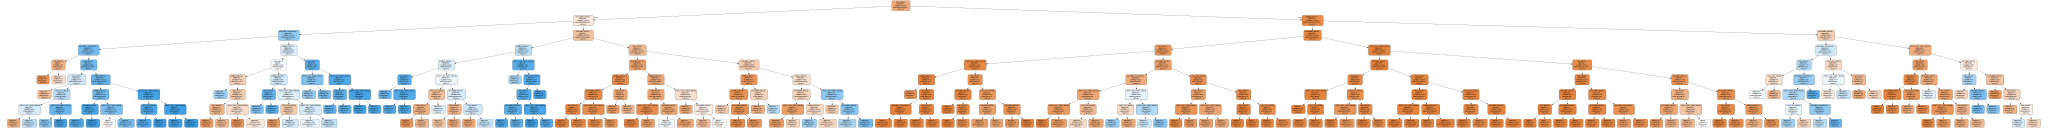

In [203]:
#Part 6: Visualize Your Best Decision Tree using GraphViz

#Starts to count how long the code will run for
start_time=time.time()
#Runs the model based on the factors that we decided on for best accurracy
best_model = DecisionTreeClassifier(criterion='gini', random_state=101, max_features= None, min_samples_leaf=20, max_depth=8)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
#Stops counting time for the code
end_time=time.time()

#Calculate the time past
time_ran=end_time-start_time
print(f'Elapsed Time: {time_ran} seconds')

#Put all the necessary data for the graph to be created
dot_data = export_graphviz(
    best_model,  # Your trained DecisionTreeClassifier
    out_file=None,  # No need to save it to a file
    feature_names=x_train.columns,  # Feature names
    class_names=["0", "1"],  # Target class names
    filled=True,  # Color nodes based on class
    rounded=True,  # Rounded edges for better readability
    special_characters=True
)

#Create and display the graph
graph = graphviz.Source(dot_data)
graph

In [204]:
# Part 7: Conclusion

Question 4: How long was your total run time to train the best model?

It took 0.04080653190612793 seconds to run my best model

Question 5: Did you find the BEST TREE?

Yes I did find the best tree.



Question 6: Write your observations from the visualization of the best tree



1.   The Root split on the tree starts with the Marriage Status and Relationship variable. This means that this is the most important variable and it can lead to various splits amongst other variables.
2.   Hours per week is one of the most impactful factors when it comes to the income variable. Hours per week is a feature that is involved in most trees.
3. There are some features here that have varying sample sizes when it comes to the last row of the tree.
4. There are some nodes that have a gini coefficient around 0.5 which means that there is an amount of uncertainty involved in this decision.
5. There are also some node that have a gini coefficient of 0.0 which means absolute confidence.
6. There are other factors that are linked to eachother that help with the income values


*   Age (Age sometimes means you have more experience which could lead to higher pay. Also, if you are young and good at your job it can lead to higher income)
*   Occupation (Some jobs are paid more based on the industry you are in)
* Education Level (Higher levels of education sometimes can dictate the field you enter which can give you more money)
* Capital Gain (If you have higher capital gain, it is usually because you are making more money.)





Question 7: Will this Tree "overfit"? (Hint: Is this tree "fully grown"?)

The tree for this specific model will not overfit. I know this because we are setting a max number of features and a minimum amount of sample leaves. Another indicator is that there are still some final leaves that have a gini value that is greater than 0. If it greater than 0, it is not a pure dataset and it is still possible to split into further subsets.

In [205]:
#Part 8: Prediction using the "trained" Decision Tree Model


prediction_df= pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')


# Define the new individual's data (in original categorical format)
new_data =["d. 41-50", "b. Mid - Low", "c. High", "c. > 0", "b. Mid", "b. 9-12", "d. High", "b. income","e. 55-65", "test", 1]


# Add the new piece of data to the end of the dataframe
prediction_df.loc[len(prediction_df)]=new_data

#Going through each column except for the last two and removing the letter identifier for each bin
for col in prediction_df.drop(columns = ["flag","y"]):
    prediction_df[col] = prediction_df[col].str.split(".", n=1, expand = True)[1]

#Drop the two columns that split the columns that will split for training and the overall resulting column
prediction_df=prediction_df.drop(["flag","y"], axis=1)

#Start to label encode the variables within each column
le = LabelEncoder()

# Iterate over each column in the original DataFrame
for col in prediction_df.columns:
    # Fit and transform the encoder on the column values
    encoded_values = le.fit_transform(prediction_df[col])
    # Replace the original column with the encoded values
    prediction_df[col] = encoded_values

#Draw out the new data record
test_data=prediction_df.tail(1)

# Make prediction using the best performing tree
predicted_income = best_model.predict(test_data)

print(predicted_income)

# Prints the predicted probability that the model classified the test data correctly
predicted_probability= best_model.predict_proba(test_data)

print(predicted_probability)


[1]
[[0.04761905 0.95238095]]


Question 8: What is the probability that your prediction for this person is correct?

The probability that my prediction for this person was correct is 95.24%.